In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno

import matplotlib.pyplot as plt
from dependencies.auxiliar import aux

import warnings
warnings.filterwarnings("ignore")

In [2]:
DATA_RAW_PATH = '../data/raw/'
DATA_INTER_PATH = '../data/interim/'
FIGURES = '../figures/'
DATA_RAW_NAME = 'teste_smarkio_lbs.xls'
DATA_INTER_NAME = 'df_1.csv'

Os datasets possuem as seguintes colunas:
1. Primeira aba - Análise_ML:

    **a. pred_class - A classe que foi identificada pelo modelo;**
    
    **b. probabilidade - A probabilidade da classe que o modelo identificou;**
    
    **c. status - status da classificação de acordo com um especialista (approved);**

    **d. true_class - A classe verdadeira (se nula, assumir o pred_class);**
    
    **Obs: Se pred_class é igual a true_class, temos que o modelo acertou.**


2. Segunda aba - NLP:

    **a. letra - trecho de música;**
    
    **b. artista - cantora referente a letra**

In [3]:
df_raw = pd.read_excel(DATA_RAW_PATH+DATA_RAW_NAME, 'Análise_ML')
df_raw.head(7)

,Pred_class,probabilidade,status,True_class
0,2,0.079892,approved,0.0
1,2,0.379377,approved,74.0
2,2,0.379377,approved,74.0
3,2,0.420930,approved,74.0
4,2,0.607437,approved,NaN
5,2,0.690894,approved,NaN
6,2,0.759493,approved,NaN


In [4]:
aux(df_raw)

,colunas,tipo,missing,size,unicos,percentual%
Pred_class,Pred_class,int64,0,643,80,0.0
probabilidade,probabilidade,float64,0,643,492,0.0
status,status,object,0,643,2,0.0
True_class,True_class,float64,462,643,40,71.9


<AxesSubplot:>

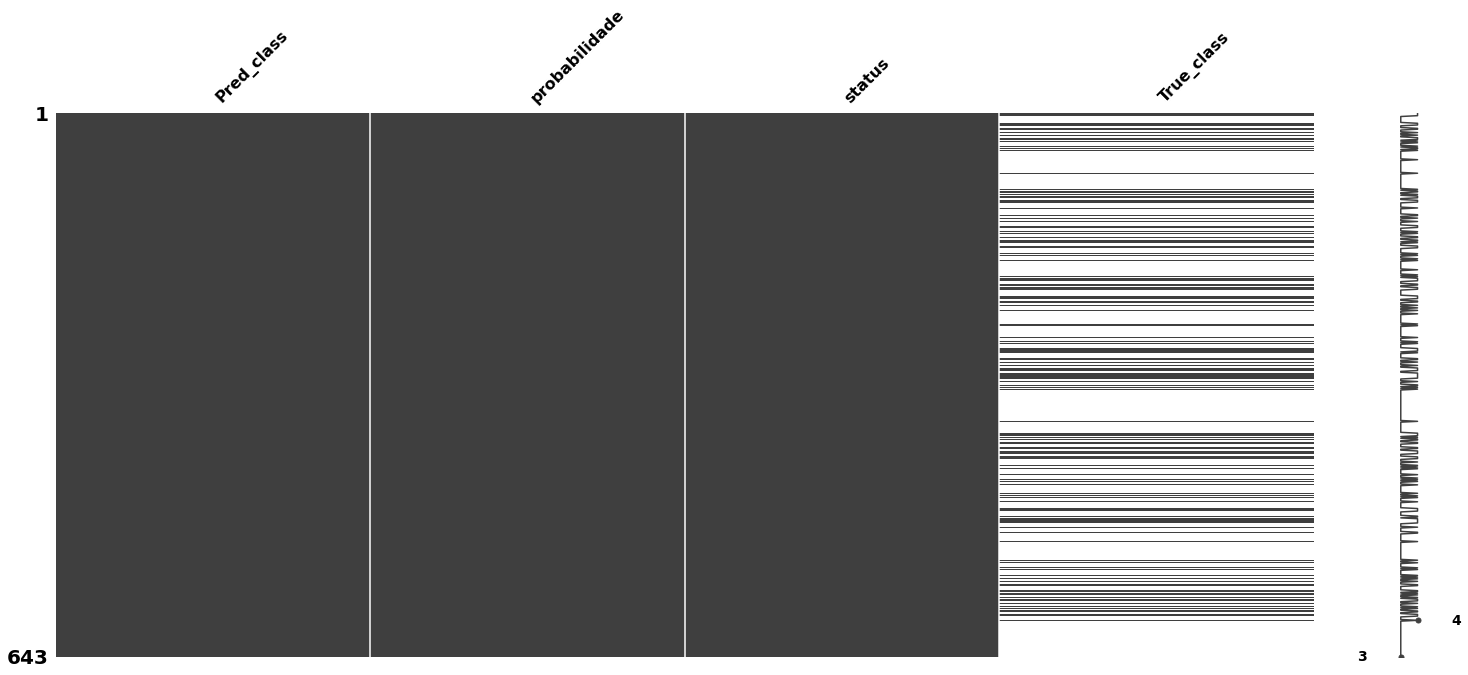

In [5]:
msno.matrix(df_raw)

- Percebemos que 71,9% dos dados em True_class estão ausentes, porém, como consta no enunciado do case, podemos considerar que o o modelo acertou e assumir para os valores nulos que Pred_class = True_class.

Solução:
Irei imputar esses dados para ter uma análise descritiva correta.

In [6]:
df = df_raw.copy()

for i, j in df_raw.iterrows():
    if np.isnan(j['True_class']):
        df.loc[i, 'True_class'] = j['Pred_class']

In [7]:
df.to_csv(DATA_INTER_PATH+DATA_INTER_NAME, index=False)

### Questão 1: 
#### Análise exploratória dos dados utilizando estatística descritiva e inferencial, considerando uma, duas e/ou mais variáveis.

Trabalharemos com o dataset somente quando a *feature* status estiver como **approved** já que, como consta no enunciado:
> status - status da classificação de acordo com um especialista (approved);

In [8]:
df_approved = df[df['status'] == 'approved']

Irei utilizar uma *flag* para classificar se:
- Pred_class == True_class, logo = 1
- Pred_class != True_class, logo = 0

In [9]:
df_approved['correct'] = np.where(df_approved['Pred_class'] == df_approved['True_class'], 1, 0)

In [10]:
df_approved.describe()

,Pred_class,probabilidade,True_class,correct
count,600.000000,600.000000,600.000000,600.000000
mean,53.545000,0.629549,48.765000,0.698333
std,37.796944,0.270583,38.881651,0.459364
min,2.000000,0.043858,0.000000,0.000000
25%,12.000000,0.411801,3.000000,0.000000
50%,60.000000,0.635104,60.000000,1.000000
75%,82.000000,0.881497,77.000000,1.000000
max,118.000000,1.000000,118.000000,1.000000


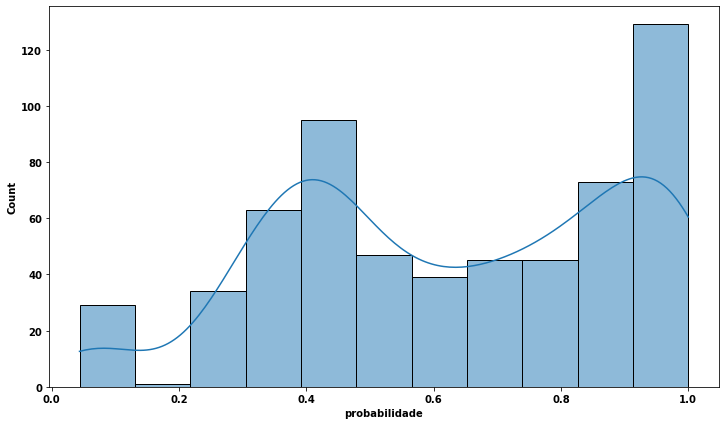

In [11]:
fig = plt.figure(figsize=(12, 7))
sns.histplot(df_approved['probabilidade'], kde=True)
fig.savefig(FIGURES+'/dist_proba.png')

Irei separar o *DataFrame* em 3:

> - Probabilidade <= 0.3;
> - Probabilidade > 0.3 e Probabilidade <= 0.6;
> - Probabilidade > 0.6.

In [12]:
df_approved_03 = df_approved[df_approved['probabilidade'] <= 0.3]
df_approved_0306 = df_approved[(df_approved['probabilidade'] > 0.3) & (df_approved['probabilidade'] <= 0.6)]
df_approved_06 = df_approved[df_approved['probabilidade'] > 0.6]

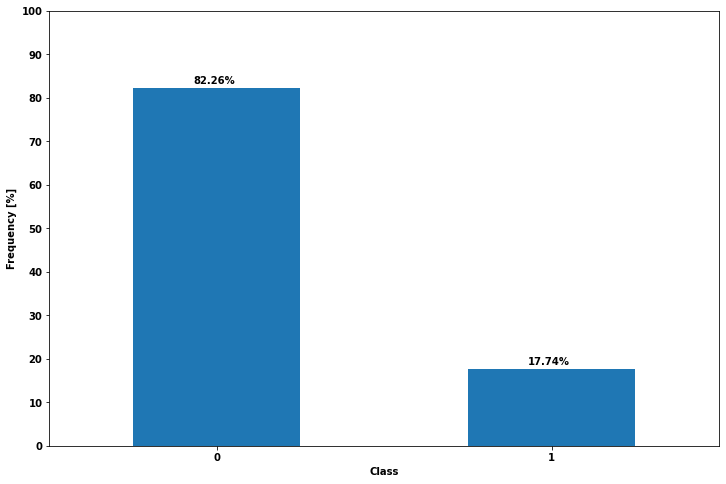

In [13]:
fig = plt.figure(figsize=(12,8))
plt.xlabel('Class')
plt.ylabel('Frequency [%]')

ax = (df_approved_03['correct'].value_counts()/len(df_approved_03)*100).sort_index().plot(kind="bar", rot=0)
ax.set_yticks(np.arange(0, 110, 10))


for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.18, p.get_height()+1))

fig.savefig(FIGURES+'/prob_03.png')

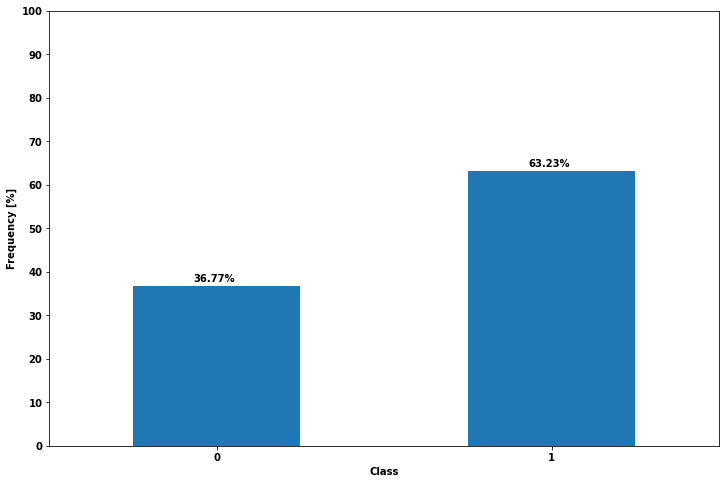

In [14]:
fig = plt.figure(figsize=(12,8))
plt.xlabel('Class')
plt.ylabel('Frequency [%]')

ax = (df_approved_0306['correct'].value_counts()/len(df_approved_0306)*100).sort_index().plot(kind="bar", rot=0)
ax.set_yticks(np.arange(0, 110, 10))


for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.18, p.get_height()+1))

fig.savefig(FIGURES+'/prob_0306.png')

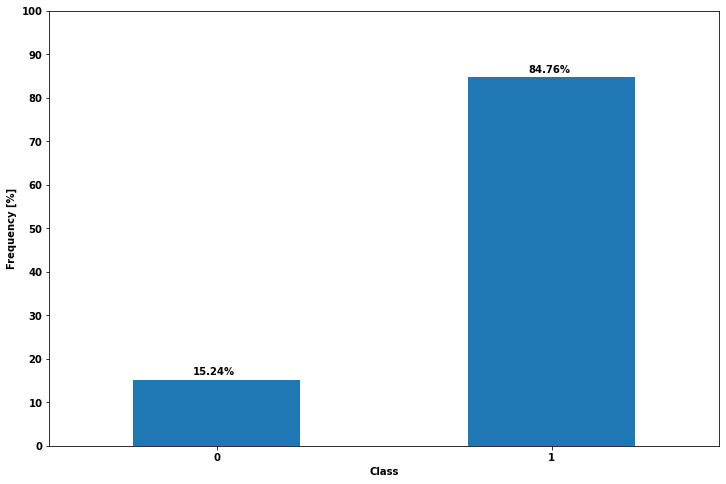

In [15]:
fig = plt.figure(figsize=(12,8))
plt.xlabel('Class')
plt.ylabel('Frequency [%]')

ax = (df_approved_06['correct'].value_counts()/len(df_approved_06)*100).sort_index().plot(kind="bar", rot=0)
ax.set_yticks(np.arange(0, 110, 10))


for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.18, p.get_height()+1))

fig.savefig(FIGURES+'/prob_06.png')

Como já previsto, mas demonstrado graficamente, o modelo erra mais quando a probabilidade de certeza quanto a resposta é baixa e a medida que o a probabilidade sobe o modelo acerta mais.